In [3]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [40]:
X, y = make_blobs(n_samples=2000,      # total samples (100 per class)
                  centers=2,          # 2 classes
                  n_features=2,       # 2D dataset
                  cluster_std=2.0,    # spread of clusters
                  random_state=42)


# changing this in Dataframe 

df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

df.head(10)

,x1,x2,y
0,-4.488407,8.762712,0
1,-1.547179,9.462054,0
2,-1.335483,13.395197,0
3,6.654767,-0.536676,1
4,-4.460944,11.121570,0
5,8.614001,0.911228,1
6,-3.812870,9.109083,0
7,4.288751,3.310479,1
8,-0.558802,10.016474,0
9,8.811973,-0.056349,1


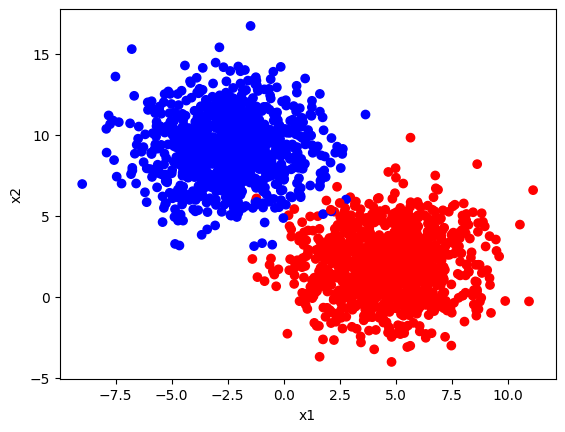

In [5]:
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='bwr')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [6]:
# Splitting features and output column
X = df[['x1','x2']].values
Y = df['y'].values

In [7]:
# making a neural network 

class Perceptron:

    def __init__(self, learning_rate=0.01, epoches=10):
        self.weight = None
        self.bias = 0.0
        self.learning_rate = learning_rate
        
        self.epoches = epoches
        self.convergence = []
        self.loss_history = []
        
    def fit(self, X, Y):
        n_sample, n_features = X.shape
        # Weight initialization 
        self.weight = np.zeros(n_features)
        # Bias initialization 
        self.bias = 0.0
        
        for epoch in range(self.epoches):
            mistake = 0
            w, b = [], []
            total_error = 0  # track error sum for averaging
            
            for xi, yi in zip(X, Y):
                # Weighted sum
                z = np.dot(xi, self.weight) + self.bias
                # Prediction
                y_hat = 1 if z >= 0 else 0
                # Error
                error = yi - y_hat
                total_error += abs(error)

                # Update if misclassified
                if error != 0:
                    self.weight += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    w.append(self.weight.copy())   # store updated weights
                    b.append(self.bias)            # store updated bias
                    mistake += 1
            
            # Average error across all samples
            avg_error = total_error / n_sample
            self.loss_history.append(avg_error)
            
            # Average weights/bias across updates (only if updates happened)
            avg_w = np.mean(w, axis=0) if w else self.weight
            avg_b = np.mean(b) if b else self.bias
            self.convergence.append(mistake)
            
            print(f"Epoch {epoch+1}: mistakes={mistake}, avg_error={avg_error:.2f}, "f"avg_weights={avg_w}, avg_bias={avg_b:.4f}")
            print("-"*100)
            if mistake == 0:
                print("Converged")
                break

    def prediction(self,X):
        x = np.array(X,dtype = float)
        z = x @ self.weight + self.bias
        return (z >=0).astype(int)


    def score(self,X,Y):
        y = np.array(Y,dtype = int)
        return (prediction(X) == y).mean()

    

In [25]:
def plot_loss(self):
        plt.plot(range(1, len(self.loss_history)+1), self.loss_history, marker='o', color='blue')
        plt.xlabel("Epoch")
        plt.ylabel("Average Loss")
        plt.title("Epoch vs Average Loss")
        plt.grid(True)
        plt.show()

    # Plot 2: Epoch vs Mistakes
def plot_mistakes(self):
        plt.plot(range(1, len(self.convergence)+1), self.convergence, marker='o', color='red')
        plt.xlabel("Epoch")
        plt.ylabel("Mistakes")
        plt.title("Epoch vs Mistakes")
        plt.grid(True)
        plt.show()

In [17]:
print(p.weight,p.bias)

[ 0.17653641 -0.13363858] 0.6100000000000003


In [16]:
p = Perceptron(epoches = 10)
p.fit(X,Y)


Epoch 1: mistakes=51, avg_error=0.03, avg_weights=[ 0.14384191 -0.06758156], avg_bias=0.1082
----------------------------------------------------------------------------------------------------
Epoch 2: mistakes=33, avg_error=0.02, avg_weights=[ 0.17123078 -0.09437503], avg_bias=0.2545
----------------------------------------------------------------------------------------------------
Epoch 3: mistakes=24, avg_error=0.01, avg_weights=[ 0.15387532 -0.09351967], avg_bias=0.3342
----------------------------------------------------------------------------------------------------
Epoch 4: mistakes=21, avg_error=0.01, avg_weights=[ 0.16301179 -0.10683991], avg_bias=0.3776
----------------------------------------------------------------------------------------------------
Epoch 5: mistakes=24, avg_error=0.01, avg_weights=[ 0.17755747 -0.12067016], avg_bias=0.4233
----------------------------------------------------------------------------------------------------
Epoch 6: mistakes=19, avg_erro

In [ ]:
p.prediction()

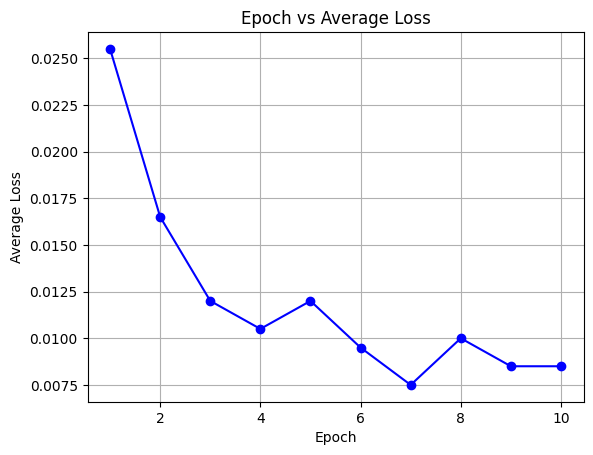

In [18]:
p.plot_loss()


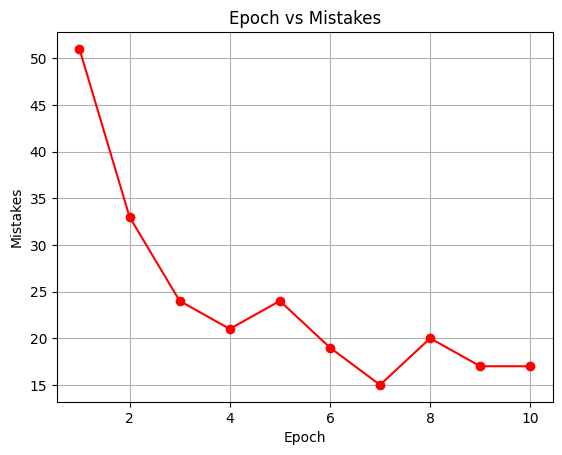

In [19]:
p.plot_mistakes()

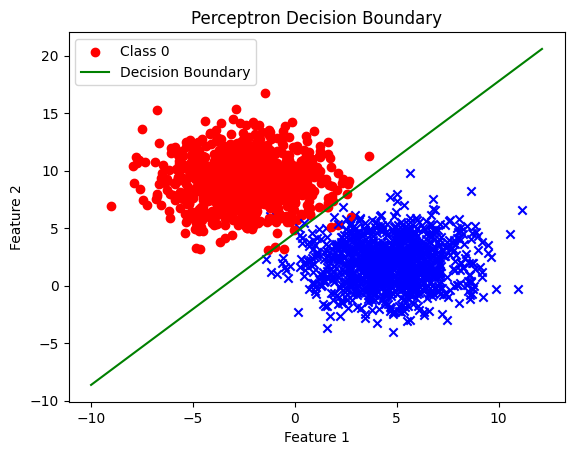

In [22]:
# Get final weights & bias
w = p.weight
b = p.bias

# Plot dataset points
for i, label in enumerate(Y):
    if label == 0:
        plt.scatter(X[i,0], X[i,1], color="red", marker="o", label="Class 0" if i==0 else "")
    else:
        plt.scatter(X[i,0], X[i,1], color="blue", marker="x", label="Class 1" if i==2 else "")

# Create decision boundary
x1_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
x2_vals = -(w[0]/w[1]) * x1_vals - b/w[1]

plt.plot(x1_vals, x2_vals, color="green", label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Perceptron Decision Boundary")
plt.show()